In [1]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.1.0
1.18.5


In [2]:
from modules.replace_dep import replace_with_dict, remove_college

In [3]:
df_abstact_wrangle = pd.read_csv("data_wrangled/df_abstract_wrangle.csv", encoding="utf-8")
df_abstact_wrangle.sample(5)

,대학코드,제목,학과,과정,년도,BERT_SCORE,RNN_SCORE,REVIEW_LINK
1804,DE000001,튀빙엔에서의 잊지못할 경험들,독어독문학과,학부,2014-2015,1,0.939721,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4950,RU000003,2010 in 뻬쩨르,노어노문학과,학부,2010,0,0.515649,http://oia.yonsei.ac.kr/partner/expReport.asp?...
8321,US000189,잊지 못할 데이비스에서의 1년♡,경제학과/심리학과,학부,2011,1,0.879563,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4692,NO000003,"꿈같던 시간, 나의 오슬로",국어국문학과,학부,2014,0,0.833903,http://oia.yonsei.ac.kr/partner/expReport.asp?...
5011,SE000003,잊지 못 할 5개월,사회학과,학부,2015,1,0.856529,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [4]:
df_abstact_wrangle["학과"] = df_abstact_wrangle["학과"].fillna(" ")
df_abstact_wrangle["학과"].isnull().values.any()

False

In [5]:
# 이중전공 두 개로 쪼개기
import re
import numpy as np
from itertools import chain

# return list from series of comma-separated strings
def split_double_majors(str):
    return re.split(',|/', str)

def chainer(series):
    # print(series)
    return list(chain.from_iterable(series.apply(split_double_majors)))

# calculate lengths of splits
# lens = df_abstact_wrangle['학과'].str.split('/').map(len)
lens = df_abstact_wrangle['학과'].apply(split_double_majors).map(len)
lens

0        2
1        1
2        1
3        1
4        1
        ..
11178    1
11179    2
11180    1
11181    1
11182    1
Name: 학과, Length: 11183, dtype: int64

In [6]:
# create new dataframe, repeating or chaining as appropriate
res = pd.DataFrame({'대학코드': np.repeat(df_abstact_wrangle['대학코드'], lens),
                    '제목': np.repeat(df_abstact_wrangle['제목'], lens),
                    '학과': chainer(df_abstact_wrangle['학과']),
                    '과정': np.repeat(df_abstact_wrangle['과정'], lens),
                    '년도': np.repeat(df_abstact_wrangle['년도'], lens),
                    'BERT_SCORE': np.repeat(df_abstact_wrangle['BERT_SCORE'], lens),
                    'RNN_SCORE': np.repeat(df_abstact_wrangle['RNN_SCORE'], lens),
                    'REVIEW_LINK': np.repeat(df_abstact_wrangle['REVIEW_LINK'], lens),})
res.head()

,대학코드,제목,학과,과정,년도,BERT_SCORE,RNN_SCORE,REVIEW_LINK
0,730,리투아니아에서 행복했던 4개월,사회복지학과,학부,2019,1,0.752021,http://oia.yonsei.ac.kr/partner/expReport.asp?...
0,730,리투아니아에서 행복했던 4개월,언론홍보영상학부,학부,2019,1,0.752021,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000004,아르헨티나 교환학생(어학연수프로그램),건축학과,학부,2013-1,0,0.399670,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AT000001,쿠프슈타인에서 노후 50년 땡겨쓰기,경영학과,학부,2017-2018,0,0.416185,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AT000001,평화로운 쿠프에서의 한 학기,경제,학부,2017ㅡ2018,1,0.816743,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [7]:
df_department = res[["대학코드", "학과", "REVIEW_LINK"]]
df_department.head()

,대학코드,학과,REVIEW_LINK
0,730,사회복지학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
0,730,언론홍보영상학부,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000004,건축학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AT000001,경영학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AT000001,경제,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [8]:
# apply preprocessing module
df_department["학과"] = df_department["학과"].apply(lambda x: replace_with_dict(x))
df_department["학과"] = df_department["학과"].apply(lambda x: remove_college(x))
df_department.head()

,대학코드,학과,REVIEW_LINK
0,730,사회복지학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
0,730,언론홍보영상학,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000004,건축공학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AT000001,경영학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AT000001,경제학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [9]:
univ_code = "JP000023"
one_univ_departments = df_department.loc[df_department["대학코드"]==univ_code]["학과"]
one_univ_departments

3885         신문방송학과
3886         문헌정보학과
3887           경제학과
3888         영어영문학과
3889     정경대학 국제관계학
3890         역사문화학과
3891           교육학과
3892         국어국문학과
3893         생활디자인과
3894         신문방송학과
3895         사회체육학과
3896         영어영문학과
3897        기계전자공학부
3898         신문방송학과
3899         보건행정학과
3900    사회과학계열 행정학과
3901         영어영문학과
3902          도시공학과
3903         정치외교학과
3904           상경계열
3905        생활디자인전공
3906         신문방송학과
Name: 학과, dtype: object

In [10]:
from collections import Counter, OrderedDict

dict_departments = Counter(one_univ_departments)
ordered_dict_departments= OrderedDict(dict_departments.most_common())
departments = list(ordered_dict_departments.keys())
number_of_students = list(ordered_dict_departments.values())
print(departments, number_of_students)

['신문방송학과', '영어영문학과', '문헌정보학과', '경제학과', '정경대학 국제관계학', '역사문화학과', '교육학과', '국어국문학과', '생활디자인과', '사회체육학과', '기계전자공학부', '보건행정학과', '사회과학계열 행정학과', '도시공학과', '정치외교학과', '상경계열', '생활디자인전공'] [4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
from collections import Counter, OrderedDict

univ_code = "DE000003"
one_univ_departments = df_department.loc[df_department["대학코드"]==univ_code]["학과"]
one_univ_departments

dict_departments = Counter(one_univ_departments)
ordered_dict_departments= OrderedDict(dict_departments.most_common())
departments = list(ordered_dict_departments.keys())
number_of_students = list(ordered_dict_departments.values())
print(departments, number_of_students)

['독어독문학과', '영어영문학과', '경영학과', '정치외교학과', '생활디자인학과', '사학과', '문화인류학과', 'philosophie', '사회복지학과', '교육학과', '심리학과', '인문학부', '유럽어문학부', '상경계열'] [32, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


NanumGothic


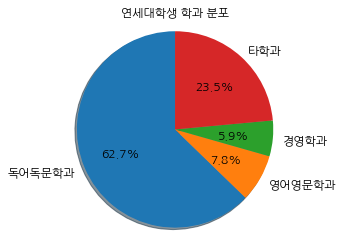

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 폰트 설정
fontpath = '/Users/noopy/yonsei-exchange-program/font/NanumGothic.ttf'
from matplotlib import font_manager, rc
font_manager._rebuild()
font_name = font_manager.FontProperties(fname=fontpath).get_name()
print(font_name)
rc('font', family=font_name)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = departments[:3] + ["타학과"]
sizes = number_of_students[:3] + [sum(number_of_students[3:])]

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("연세대학생 학과 분포")

plt.show()


In [33]:
file_name = univ_code
ax1.figure.savefig(f'{file_name}.png')